In [1]:
import tensorflow as tf
import numpy as np
from gbica_utils import *
from tf_powersfa import *

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
n_out = 3

In [3]:
N = 1000

encoding_x = tf.placeholder("float", [N,3])

Wx  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_out]))
b0   = tf.Variable(tf.constant(0.1,shape=[n_out]))

dense0 = tf.matmul(encoding_x, Wx) + b0
dense = alt_power_whitening(dense0, 3, 50)[0]

In [4]:
n_hidden = 32

y1, y2, y3 = tf.split(dense, 3, axis=1)

In [5]:
x1 = tf.concat([y2, y3], axis=1)
y_1 = permute_y(y1, N)

h_join1 = tf.concat([y1, x1], axis=1)
h_marg1 = tf.concat([y_1, x1], axis=1)

Wx1  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_hidden]))
b1   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx2  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b2   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx3  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b3   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx4  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b4   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx5  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b5   = tf.Variable(tf.constant(0.1,shape=[1]))

Wx6  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, 1]))
b6   = tf.Variable(tf.constant(0.1,shape=[1]))

dense6_joint, dense6_marg = estimator_net_split(h_join1, h_marg1,
                                          Wx1,  b1,  Wx2,  b2,  Wx3,  b3,  Wx4,  b4,  Wx5,  b5,  Wx6,  b6)

loss1 = tf.reduce_mean(dense6_joint)-tf.log(tf.reduce_mean(tf.exp(dense6_marg)))

In [6]:
x2 = tf.concat([y1, y3], axis=1)
y_2 = permute_y(y2, N)

h_join2 = tf.concat([y2, x2], axis=1)
h_marg2 = tf.concat([y_2, x2], axis=1)

Wx12  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_hidden]))
b12   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx22  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b22   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx32  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b32   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx42  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b42   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx52  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b52   = tf.Variable(tf.constant(0.1,shape=[1]))

Wx62  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, 1]))
b62   = tf.Variable(tf.constant(0.1,shape=[1]))

dense6_joint2, dense6_marg2 = estimator_net_split(h_join2, h_marg2, Wx12,  b12,  Wx22,  b22,
                                           Wx32,  b32,  Wx42,  b42,  Wx52, b52,  Wx62,  b62)

loss2 = tf.reduce_mean(dense6_joint2)-tf.log(tf.reduce_mean(tf.exp(dense6_marg2)))

In [7]:
x3 = tf.concat([y1, y2], axis=1)
y_3 = permute_y(y3, N)

h_join3 = tf.concat([y3, x3], axis=1)
h_marg3 = tf.concat([y_3, x3], axis=1)

Wx13  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_hidden]))
b13   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx23  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b23   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx33  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b33   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx43  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b43   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx53  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b53   = tf.Variable(tf.constant(0.1,shape=[1]))

Wx63  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, 1]))
b63   = tf.Variable(tf.constant(0.1,shape=[1]))

dense6_joint3, dense6_marg3 = estimator_net_split(h_join3, h_marg3, Wx13,  b13,  Wx23,  b23,
                                            Wx33,  b33,  Wx43,  b43,  Wx53,  b53,  Wx63,  b63)


loss3 = tf.reduce_mean(dense6_joint3)-tf.log(tf.reduce_mean(tf.exp(dense6_marg3)))

In [8]:
estimator_loss = -(loss1+loss2+loss3)

total_encoder_loss = loss1+loss2+loss3
encoder_lr = 0.005

train_encoders = tf.train.AdamOptimizer(encoder_lr).minimize(total_encoder_loss, var_list=[Wx, b0])
estimator_vars = [Wx1,  b1,  Wx2,  b2,  Wx3,  b3,  Wx4,  b4,  Wx5,  b5,  Wx6,  b6,
                  Wx12, b12, Wx22, b22, Wx32, b32, Wx42, b42, Wx52, b52, Wx62, b62,
                  Wx13, b13, Wx23, b23, Wx33, b33, Wx43, b43, Wx53, b53, Wx63, b63]

regularizer = tf.contrib.layers.l2_regularizer(scale=0.002)

for var in estimator_vars:
    tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, var)
reg_variables = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
reg_term = tf.contrib.layers.apply_regularization(regularizer, reg_variables)
estimator_loss += reg_term
train_estimators =  tf.contrib.opt.NadamOptimizer(0.005).minimize(estimator_loss, var_list=estimator_vars) 

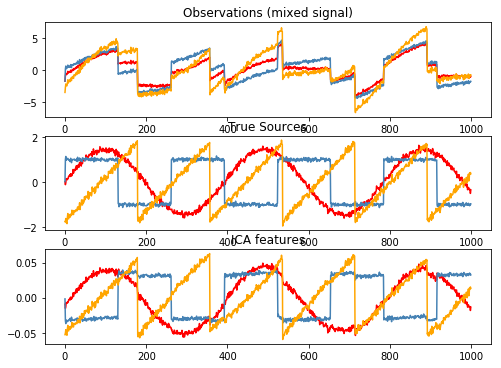

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA
from scipy import signal

time = np.linspace(0, 8, N)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(1.4 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.05 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1  , 1, 1],
              [0.5, 2, 1.0],
              [1.5, 1.0, 2.0]])  
X = np.dot(S, A.T)  # Generate observations

# Solve the task with FastICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals

models = [X, S, S_]
names = ['Observations (mixed signal)', 'True Sources', 'ICA features']
colors = ['red', 'steelblue', "orange"]
plt.figure(figsize=(8, 8))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
plt.show()

In [10]:
shuffled_x = np.array(X)

step: 0, loss1: -0.0094, loss2: -0.0097, loss3: -7.4e-05, all_loss: -0.019


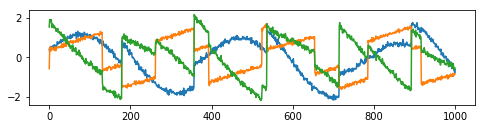

step: 100, loss1: 0.28, loss2: -0.066, loss3: 0.22, all_loss: 0.43
step: 200, loss1: 0.39, loss2: 0.18, loss3: 0.3, all_loss: 0.87
step: 300, loss1: 0.53, loss2: 0.74, loss3: 0.36, all_loss: 1.6
step: 400, loss1: 0.059, loss2: 0.45, loss3: 0.41, all_loss: 0.92


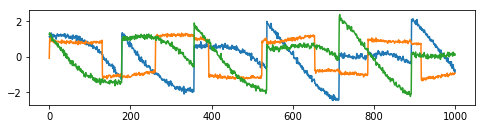

step: 500, loss1: -0.052, loss2: 0.15, loss3: 0.46, all_loss: 0.56
step: 600, loss1: 0.58, loss2: 0.12, loss3: 0.45, all_loss: 1.2
step: 700, loss1: 0.58, loss2: 0.22, loss3: 0.51, all_loss: 1.3
step: 800, loss1: 0.72, loss2: 0.046, loss3: 0.65, all_loss: 1.4


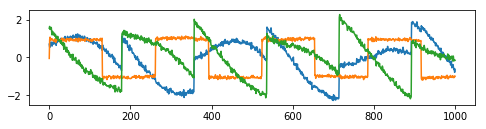

step: 900, loss1: 0.62, loss2: 0.21, loss3: 0.59, all_loss: 1.4
step: 1000, loss1: 0.77, loss2: 0.15, loss3: 0.6, all_loss: 1.5
step: 1100, loss1: -0.13, loss2: 0.068, loss3: 0.71, all_loss: 0.65
step: 1200, loss1: 0.84, loss2: 0.14, loss3: 0.31, all_loss: 1.3


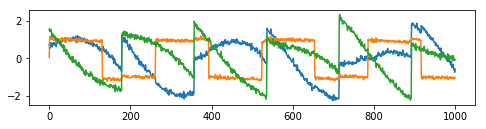

step: 1300, loss1: 0.65, loss2: 0.17, loss3: 0.28, all_loss: 1.1
step: 1400, loss1: 0.48, loss2: 0.41, loss3: 0.25, all_loss: 1.1
step: 1500, loss1: 1.1, loss2: 0.28, loss3: 0.76, all_loss: 2.1
step: 1600, loss1: 1.0, loss2: 0.68, loss3: 0.8, all_loss: 2.5


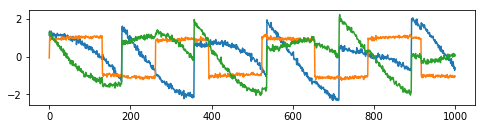

step: 1700, loss1: 0.7, loss2: 0.89, loss3: 0.59, all_loss: 2.2
step: 1800, loss1: 0.75, loss2: 0.45, loss3: 0.55, all_loss: 1.8
step: 1900, loss1: 0.86, loss2: 0.27, loss3: 0.54, all_loss: 1.7
step: 2000, loss1: 0.87, loss2: 0.39, loss3: 0.7, all_loss: 2.0


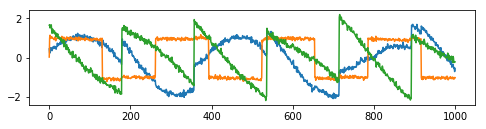

step: 2100, loss1: 0.77, loss2: 0.69, loss3: 0.55, all_loss: 2.0
step: 2200, loss1: 0.0025, loss2: 0.0073, loss3: 0.048, all_loss: 0.058
step: 2300, loss1: 0.043, loss2: 0.0047, loss3: 0.47, all_loss: 0.52
step: 2400, loss1: 0.52, loss2: 0.14, loss3: 0.45, all_loss: 1.1


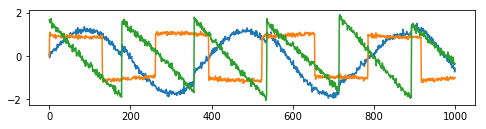

step: 2500, loss1: 0.56, loss2: 0.046, loss3: 0.67, all_loss: 1.3
step: 2600, loss1: 0.4, loss2: 0.074, loss3: 0.47, all_loss: 0.94
step: 2700, loss1: 0.75, loss2: 0.84, loss3: 0.65, all_loss: 2.2
step: 2800, loss1: 0.072, loss2: 0.79, loss3: -0.0042, all_loss: 0.86


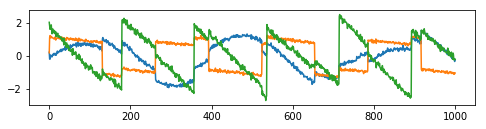

step: 2900, loss1: 0.38, loss2: 0.24, loss3: 0.46, all_loss: 1.1
step: 3000, loss1: 0.68, loss2: 0.48, loss3: 0.57, all_loss: 1.7
step: 3100, loss1: 0.61, loss2: 0.71, loss3: 0.57, all_loss: 1.9
step: 3200, loss1: 0.65, loss2: 0.51, loss3: 0.63, all_loss: 1.8


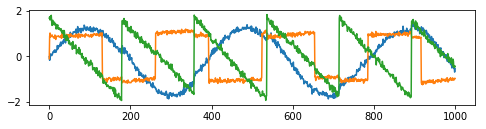

step: 3300, loss1: 0.68, loss2: 0.47, loss3: 0.7, all_loss: 1.8
step: 3400, loss1: 0.86, loss2: 0.44, loss3: 0.7, all_loss: 2.0
step: 3500, loss1: 0.39, loss2: 0.3, loss3: 0.72, all_loss: 1.4
step: 3600, loss1: 1.1, loss2: 0.4, loss3: 0.58, all_loss: 2.1


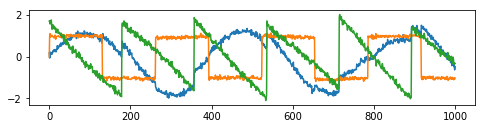

step: 3700, loss1: 0.56, loss2: 0.67, loss3: 0.81, all_loss: 2.0
step: 3800, loss1: 0.71, loss2: 0.62, loss3: 0.64, all_loss: 2.0
step: 3900, loss1: 0.72, loss2: 0.5, loss3: 0.81, all_loss: 2.0
step: 4000, loss1: 0.82, loss2: 0.43, loss3: 0.98, all_loss: 2.2


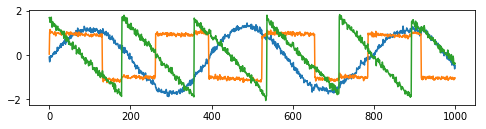

In [11]:
from random import shuffle
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(4001):
        np.random.shuffle(shuffled_x)
        current_loss1, current_loss2, current_loss3, _ = sess.run([loss1,
                                                    loss2, loss3, train_estimators], feed_dict={encoding_x:X})

        if i % 7   is 0: 
            _ = sess.run(train_encoders, feed_dict={encoding_x:X})

        if i % 100 is 0: 
            print("step: {}, loss1: {:.2}, loss2: {:.2}, loss3: {:.2}, all_loss: {:.2}".format(i,
                                current_loss1, current_loss2, current_loss3, current_loss1+current_loss2+current_loss3))
        if i % 400 is 0:
            plt.figure(figsize=(8, 8))
            plt.subplot(4, 1, 1)
            encoding = sess.run(dense, feed_dict={encoding_x:X})
            plt.plot(encoding)
            plt.show()